In [1]:
# Initialize Otter
import otter
grader = otter.Notebook()

# Homework 4: Trump, Twitter, and Text

## Due Date: Thursday 10/08, 11:59 pm PST

Welcome to the fourth homework assignment of Data 100/200! In this assignment, we will work with Twitter data in order to analyze Donald Trump's tweets.

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about the homework, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** below.

**Collaborators**: *list collaborators here*

In [2]:
# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import zipfile

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

### Score Breakdown

Question | Points
--- | ---
0 | 1
1 | 2
2 | 1
3 | 2
4a | 1
4b | 2
4c | 2
4d | 1
5a | 1
5b | 1
5c | 1
5d | 1
5e | 1
5f | 2
5g | 2
5h | 1
6a | 1
6b | 1
7a | 2
7b | 1
Total | 27

## Before we start ##
All data is made from real-world phenomena, be it the movement of the planets, animal behavior, or human bodies and activities. Working with data always has a bearing back on how human beings know and act in the world. The dataset that you're about to work with in this homework consists of a compilation of President Trump's Tweets. It's important to acknowledge that these Tweets are more than just data -- they're the means by which the President expresses his opinions, performs public and foreign policy, and shapes the lives of people in the US and all over the world. More fundamentally, these Tweets are a powerful form of speech that is particularly significant on the eve of the 2020 US Presidential Election. We recognize that working with this data now, even in the context of a technical exercise, is not a neutral activity and may create difficult feelings in students. We encourage you to observe what you may be experiencing and invite you to consider these dimensions of data science work alongside your technical lessons and we're glad to discuss these issues together in section.

## Disclaimer about `sns.distplot()`

This homework was designed for a slightly older version of seaborn, which does not support the new `displot` method taught in Lecture 9. Instead, in this homework we will heavily rely on `distplot` (with a `t`). As you may have noticed in lab 5, use of the `distplot` function triggers a deprecation warning to notify the user that they should replace all deprecated functions with the updated version. Generally, warnings should not be suppressed but we will do so in this assignment to avoid cluttering.

See the seaborn documentation on [distributions](https://seaborn.pydata.org/tutorial/distributions.html) and [functions](https://seaborn.pydata.org/tutorial/function_overview.html) for more details.

In [3]:
# Run this cell to suppress all DeprecationWarnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

---
# Part 1: Importing the Data

We will use the `fetch_and_cache` utility to download the dataset. 

In [4]:
# Download the dataset
from ds100_utils import fetch_and_cache
data_url = 'http://www.ds100.org/fa19/assets/datasets/hw4-realdonaldtrump_tweets.json.zip'
file_name = 'hw4-realdonaldtrump_tweets.json.zip'

dest_path = fetch_and_cache(data_url=data_url, file=file_name)
print(f'Located at {dest_path}')

Using version already downloaded: Mon Oct  5 11:44:49 2020
MD5 hash of file: 664c6f85e94ea09e1507eedd7626adc5
Located at data/hw4-realdonaldtrump_tweets.json.zip


Now that we've downloaded the tweets, let's unzip them and load them into our notebook. Run the cell below to unzip and read tweets from the json file into a list named `all_tweets`.

In [5]:
# Unzip the dataset
my_zip = zipfile.ZipFile(dest_path, 'r')
with my_zip.open('hw4-realdonaldtrump_tweets.json', 'r') as f:
    all_tweets = json.load(f)

Here is what a typical tweet from `all_tweets` looks like:

In [6]:
from pprint import pprint # to get a more easily-readable view.
pprint(all_tweets[-1])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 16 18:40:18 +0000 2018',
 'display_text_range': [0, 174],
 'entities': {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []},
 'favorite_count': 52115,
 'favorited': False,
 'full_text': 'Just spoke with the Crown Prince of Saudi Arabia who totally '
              'denied any knowledge of what took place in their Turkish '
              'Consulate. He was with Secretary of State Mike Pompeo...',
 'geo': None,
 'id': 1052268011900555265,
 'id_str': '1052268011900555265',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 13493,
 'retweeted': False,
 'source': '<a href="http://twitter.com/download/iphone" '
           'rel="nofollow">Twitter for iPhone</a>',
 'truncated': False,
 'user': {'contributors_enabled': False,
  

<!-- BEGIN QUESTION -->

## Question 0
There are many ways we could choose to read the President’s tweets. Why might someone be interested in doing data analysis on the President’s tweets? Name a kind of person or institution which might be interested in this kind of analysis. Then, give two reasons why a data analysis of the President's tweets might be interesting or useful for them. Answer in 2-3 sentences.
<!--
BEGIN QUESTION
name: q0
points: 1
manual: true
-->

Someone who would be interested in this analysis may be a news anchor, Presidential Debate moderator, or someone working for the opposition's Presidential campaign, and institutions that may be interested would include news agencies e.g. CNN. 

Presidential Debate moderators may be interested because they can then tailor their questions in the debate according to particular instances of the President's reaction to something, while someone working in the opposition's Presidential campaign may be interested because they can use the President's negligence/avoidance of a certain issue to further their agenda. Furthermore, seeing users' responses to his tweets would allow institutions such as news agencies and individuals such as news anchors to get an idea about how the people are feeling about the President and his policies, and this would allow them to make informed predictions about the upcoming elections.

<!-- END QUESTION -->

## Question 1

Construct a DataFrame called `trump` containing data from all the tweets stored in `all_tweets`. The index of the DataFrame should be the ID of each tweet (looks something like `907698529606541312`). It should have these columns:

- `time`: The time the tweet was created encoded as a datetime object. (Use `pd.to_datetime` to encode the timestamp.)
- `source`: The source device of the tweet.
- `text`: The text of the tweet.
- `retweet_count`: The retweet count of the tweet. 

Finally, **the resulting DataFrame should be sorted by the index.**

**Warning:** *Some tweets will store the text in the `text` field and other will use the `full_text` field.*

**Hint: You might want to explicitly specify the columns and indices using** `pd.DataFrame()`.

<!--
BEGIN QUESTION
name: q1
points: 2
-->

In [7]:
trump = pd.DataFrame(all_tweets, columns=['created_at', 'source', 'full_text', 'text', 'retweet_count', 'id']).set_index('id')
trump['created_at'] = pd.to_datetime(trump['created_at'])
trump = trump.rename(columns={'created_at': 'time'})
trump['text'] = trump['text'].combine_first(trump['full_text'])
trump = trump.drop(columns={'full_text'})
trump = trump.sort_index(ascending=True)
trump

,time,source,text,retweet_count
id,,,,
690171032150237184,2016-01-21 13:56:11+00:00,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>","""@bigop1: @realDonaldTrump @SarahPalinUSA https://t.co/3kYQGqeVyD""",1059
690171403388104704,2016-01-21 13:57:39+00:00,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>","""@AmericanAsPie: @glennbeck @SarahPalinUSA Remember when Glenn gave out gifts to ILLEGAL ALIENS at crossing the border? Me too!""",1339
690173226341691392,2016-01-21 14:04:54+00:00,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",So sad that @CNN and many others refused to show the massive crowd at the arena yesterday in Oklahoma. Dishonest reporting!,2006
690176882055114758,2016-01-21 14:19:26+00:00,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>","Sad sack @JebBush has just done another ad on me, with special interest money, saying I won't beat Hillary - I WILL. But he can't beat me.",2266
690180284189310976,2016-01-21 14:32:57+00:00,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",Low energy candidate @JebBush has wasted $80 million on his failed presidential campaign. Millions spent on me. He should go home and relax!,2886
...,...,...,...,...
1096547516290543617,2019-02-15 23:11:15+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Great job by law enforcement in Aurora, Illinois. Heartfelt condolences to all of the victims and their families. America is with you!",21296
1096812333333184512,2019-02-16 16:43:32+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://t.co/f6Jd2FzayZ,17134
1096856815810342912,2019-02-16 19:40:18+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://t.co/nJORBjwint,29569


In [8]:
grader.check("q1")

All tests passed!

---
# Part 2: Tweet Source Analysis

In the following questions, we are going to find out the charateristics of Trump tweets and the devices used for the tweets.

First let's examine the source field:

In [9]:
trump['source'].unique()

array(['<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://mobile.twitter.com" rel="nofollow">Mobile Web (M5)</a>',
       '<a href="http://instagram.com" rel="nofollow">Instagram</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>',
       '<a href="https://periscope.tv" rel="nofollow">Periscope</a>',
       '<a href="https://ads.twitter.com" rel="nofollow">Twitter Ads</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>'],
      dtype=object)

## Question 2

Notice how sources like "Twitter for Android" or "Instagram" are surrounded by HTML tags. In the cell below, clean up the `source` field by removing the HTML tags from each `source` entry.

**Hints:** 
* Use `trump['source'].str.replace` along with a regular expression.
* You may find it helpful to experiment with regular expressions at [regex101.com](https://regex101.com/).

<!--
BEGIN QUESTION
name: q2
points: 1
-->

In [10]:
## Uncomment and complete
trump['source'] = trump['source'].str.replace(r"<.*?>", "")
trump

,time,source,text,retweet_count
id,,,,
690171032150237184,2016-01-21 13:56:11+00:00,Twitter for Android,"""@bigop1: @realDonaldTrump @SarahPalinUSA https://t.co/3kYQGqeVyD""",1059
690171403388104704,2016-01-21 13:57:39+00:00,Twitter for Android,"""@AmericanAsPie: @glennbeck @SarahPalinUSA Remember when Glenn gave out gifts to ILLEGAL ALIENS at crossing the border? Me too!""",1339
690173226341691392,2016-01-21 14:04:54+00:00,Twitter for Android,So sad that @CNN and many others refused to show the massive crowd at the arena yesterday in Oklahoma. Dishonest reporting!,2006
690176882055114758,2016-01-21 14:19:26+00:00,Twitter for Android,"Sad sack @JebBush has just done another ad on me, with special interest money, saying I won't beat Hillary - I WILL. But he can't beat me.",2266
690180284189310976,2016-01-21 14:32:57+00:00,Twitter for Android,Low energy candidate @JebBush has wasted $80 million on his failed presidential campaign. Millions spent on me. He should go home and relax!,2886
...,...,...,...,...
1096547516290543617,2019-02-15 23:11:15+00:00,Twitter for iPhone,"Great job by law enforcement in Aurora, Illinois. Heartfelt condolences to all of the victims and their families. America is with you!",21296
1096812333333184512,2019-02-16 16:43:32+00:00,Twitter for iPhone,https://t.co/f6Jd2FzayZ,17134
1096856815810342912,2019-02-16 19:40:18+00:00,Twitter for iPhone,https://t.co/nJORBjwint,29569


In [11]:
grader.check("q2")

All tests passed!

In the following plot, we see that there are two device types that are more commonly used than others.

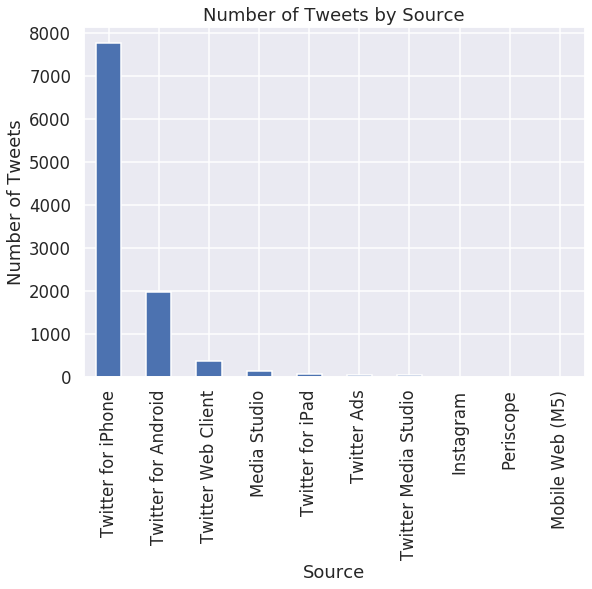

In [12]:
plt.figure(figsize=(8, 6))
trump['source'].value_counts().plot(kind="bar")
plt.xlabel('Source')
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets by Source");

## Question 3

Now that we have cleaned up the `source` field, let's look at which device Trump has used over the entire time period of this dataset.

To examine the distribution of dates we will convert the date to a fractional year that can be plotted as a distribution.

(Code borrowed from this [link](https://stackoverflow.com/questions/6451655/python-how-to-convert-datetime-dates-to-decimal-years))

In [13]:
import datetime
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length

trump['year'] = trump['time'].apply(year_fraction)

<!-- BEGIN QUESTION -->

Now, use `sns.distplot` to overlay the distributions of Trump's 2 most frequently used web technologies over the years. Your final plot should look similar to the plot below:

<img src="images/source_years_q3.png" width="600px" />

<!--
BEGIN QUESTION
name: q3
points: 2
manual: true
-->

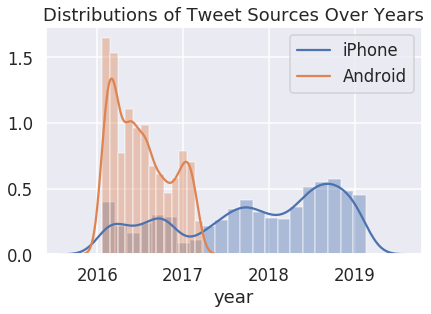

In [14]:
plt.figure(figsize=(6, 3.9))
trump_android = trump[trump['source'] == 'Twitter for Android']['year']
trump_iphone = trump[trump['source'] ==  'Twitter for iPhone']['year']
sns.distplot(trump_iphone);
sns.distplot(trump_android);
plt.legend(['iPhone', 'Android'])
plt.title('Distributions of Tweet Sources Over Years')
plt.ylabel('')
plt.show()

<!-- END QUESTION -->



## Question 4


Is there a difference between Trump's tweet behavior across these devices? We will attempt to answer this question in our subsequent analysis.

First, we'll take a look at whether Trump's tweets from an Android device come at different times than his tweets from an iPhone. Note that Twitter gives us his tweets in the [UTC timezone](https://www.wikiwand.com/en/List_of_UTC_time_offsets) (notice the `+0000` in the first few tweets).

In [15]:
for tweet in all_tweets[:3]:
    print(tweet['created_at'])

Wed Oct 12 14:00:48 +0000 2016
Wed Oct 12 13:46:43 +0000 2016
Wed Oct 12 12:59:05 +0000 2016


We'll convert the tweet times to US Eastern Time, the timezone of New York and Washington D.C., since those are the places we would expect the most tweet activity from Trump.

In [16]:
trump['est_time'] = (
    trump['time'].dt.tz_convert("EST") # Convert to Eastern Time
)
trump.head()

,time,source,text,retweet_count,year,est_time
id,,,,,,
690171032150237184,2016-01-21 13:56:11+00:00,Twitter for Android,"""@bigop1: @realDonaldTrump @SarahPalinUSA https://t.co/3kYQGqeVyD""",1059,2016.054645,2016-01-21 08:56:11-05:00
690171403388104704,2016-01-21 13:57:39+00:00,Twitter for Android,"""@AmericanAsPie: @glennbeck @SarahPalinUSA Remember when Glenn gave out gifts to ILLEGAL ALIENS at crossing the border? Me too!""",1339,2016.054645,2016-01-21 08:57:39-05:00
690173226341691392,2016-01-21 14:04:54+00:00,Twitter for Android,So sad that @CNN and many others refused to show the massive crowd at the arena yesterday in Oklahoma. Dishonest reporting!,2006,2016.054645,2016-01-21 09:04:54-05:00
690176882055114758,2016-01-21 14:19:26+00:00,Twitter for Android,"Sad sack @JebBush has just done another ad on me, with special interest money, saying I won't beat Hillary - I WILL. But he can't beat me.",2266,2016.054645,2016-01-21 09:19:26-05:00
690180284189310976,2016-01-21 14:32:57+00:00,Twitter for Android,Low energy candidate @JebBush has wasted $80 million on his failed presidential campaign. Millions spent on me. He should go home and relax!,2886,2016.054645,2016-01-21 09:32:57-05:00


### Question 4a

Add a column called `hour` to the `trump` table which contains the hour of the day as floating point number computed by:

$$
\text{hour} + \frac{\text{minute}}{60} + \frac{\text{second}}{60^2}
$$

* **Hint:** See the cell above for an example of working with [dt accessors](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#dt-accessor). You should use the `est_time` column to calculate the hour.

<!--
BEGIN QUESTION
name: q4a
points: 1
-->

In [17]:
trump['hour'] = (trump['est_time'].dt.hour) +((trump['est_time'].dt.minute)/60) + ((trump['est_time'].dt.second)/60**2)
trump.head(5)

,time,source,text,retweet_count,year,est_time,hour
id,,,,,,,
690171032150237184,2016-01-21 13:56:11+00:00,Twitter for Android,"""@bigop1: @realDonaldTrump @SarahPalinUSA https://t.co/3kYQGqeVyD""",1059,2016.054645,2016-01-21 08:56:11-05:00,8.936389
690171403388104704,2016-01-21 13:57:39+00:00,Twitter for Android,"""@AmericanAsPie: @glennbeck @SarahPalinUSA Remember when Glenn gave out gifts to ILLEGAL ALIENS at crossing the border? Me too!""",1339,2016.054645,2016-01-21 08:57:39-05:00,8.960833
690173226341691392,2016-01-21 14:04:54+00:00,Twitter for Android,So sad that @CNN and many others refused to show the massive crowd at the arena yesterday in Oklahoma. Dishonest reporting!,2006,2016.054645,2016-01-21 09:04:54-05:00,9.081667
690176882055114758,2016-01-21 14:19:26+00:00,Twitter for Android,"Sad sack @JebBush has just done another ad on me, with special interest money, saying I won't beat Hillary - I WILL. But he can't beat me.",2266,2016.054645,2016-01-21 09:19:26-05:00,9.323889
690180284189310976,2016-01-21 14:32:57+00:00,Twitter for Android,Low energy candidate @JebBush has wasted $80 million on his failed presidential campaign. Millions spent on me. He should go home and relax!,2886,2016.054645,2016-01-21 09:32:57-05:00,9.549167


In [18]:
grader.check("q4a")

All tests passed!

<!-- BEGIN QUESTION -->

### Question 4b

Use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that Trump tweets on each device for the 2 most commonly used devices.  Your final plot should look similar to the following:

<img src="images/device_hour4b.png" width="600px" />

<!--
BEGIN QUESTION
name: q4b
points: 2
manual: true
-->

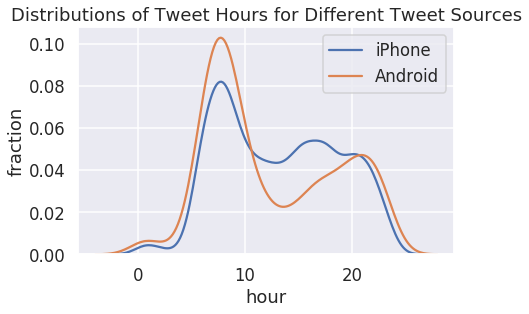

In [19]:
### make your plot here
plt.figure(figsize=(6, 3.9))
trump_android_est = trump[trump['source'] == 'Twitter for Android']['hour']
trump_iphone_est = trump[trump['source'] ==  'Twitter for iPhone']['hour']
sns.distplot(trump_iphone_est, hist=False);
sns.distplot(trump_android_est, hist=False);
plt.legend(['iPhone', 'Android'])
plt.title('Distributions of Tweet Hours for Different Tweet Sources')
plt.ylabel('fraction')
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 4c

According to [this Verge article](https://www.theverge.com/2017/3/29/15103504/donald-trump-iphone-using-switched-android), Donald Trump switched from an Android to an iPhone sometime in March 2017.

Let's see if this information significantly changes our plot. Create a figure similar to your figure from question 4b, but this time, only use tweets that were tweeted before 2017. Your plot should look similar to the following:

<img src="images/device_hour4c.png" width="600px" />

<!--
BEGIN QUESTION
name: q4c
points: 2
manual: true
-->

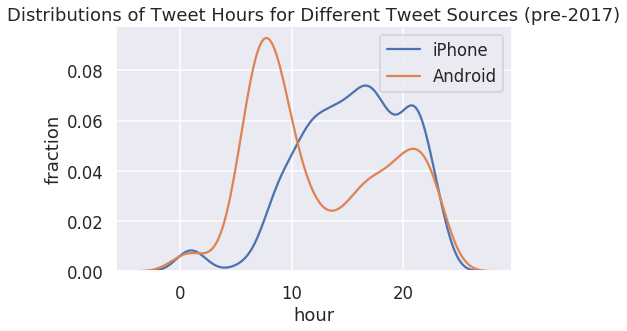

In [20]:
### make your plot here
trump_pre_2017 = trump[trump['year'] < 2017]
plt.figure(figsize=(6.32, 4.2))
trump_android = trump_pre_2017[trump_pre_2017['source'] == 'Twitter for Android']['hour']
trump_iphone = trump_pre_2017[trump_pre_2017['source'] ==  'Twitter for iPhone']['hour']
sns.distplot(trump_iphone, hist=False);
sns.distplot(trump_android, hist=False);
plt.legend(['iPhone', 'Android'])
plt.title('Distributions of Tweet Hours for Different Tweet Sources (pre-2017)')
plt.ylabel('fraction')
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 4d

During the campaign, it was theorized that Donald Trump's tweets from Android devices were written by him personally, and the tweets from iPhones were from his staff. Does your figure give support to this theory? What kinds of additional analysis could help support or reject this claim?

<!--
BEGIN QUESTION
name: q4d
points: 1
manual: true
-->

Yes, it does. Firstly, the times at which peaks occur on the above graph prove our claim. The highest number of Android tweets are near 8-9am, and that is likely to be the time when he wakes up and hence uses Twitter to set the tone for the rest of the day. On the other hand, the the highest number of iPhone tweets occur at 4-5pm, and this is likely to be the time when Trump is most swamped with presidential responsibilities. This also makes sense because the maximum of the orange graph coincides with the minimum of the blue graph and vice versa. Whenever Trump is caught up with presidential responsibilities, his staff takes over and tweets for him. 

Secondly, the "width" of each peak also supports our claim. The peak of the Android graph is narrower which makes sense because Trump is just one person, and cannot tweet consistently for so long. On the other hand, the peak of the iPhone graph is wider which aligns with our speculation because his staff consists of a group of individuals so they can all take turns tweeting. 

Something that could support or reject this claim would be if we had information about the number of social media managers he had, and their working hours. 

<!-- END QUESTION -->



---
# Part 3: Sentiment Analysis

It turns out that we can use the words in Trump's tweets to calculate a measure of the sentiment of the tweet. For example, the sentence "I love America!" has positive sentiment, whereas the sentence "I hate taxes!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I love America." is more positive than "I like America."

We will use the [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) lexicon to analyze the sentiment of Trump's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:

In [21]:
print(''.join(open("vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



As you can see, the lexicon contains emojis too! Each row contains a word and the *polarity* of that word, measuring how positive or negative the word is.

<!-- BEGIN QUESTION -->

## Question 5

The creators of VADER describe the tool’s assessment of polarity, or “compound score,” in the following way:

“The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.”

As you can see, VADER doesn't "read" sentences, but works by parsing sentences into words assigning a preset generalized score from their testing sets to each word separately. 

VADER relies on humans to stabilize its scoring. The creators use Amazon Mechanical Turk, a crowdsourcing survey platform, to train its model. Its training set of data consists of a small corpus of tweets, New York Times editorials and news articles, Rotten Tomatoes reviews, and Amazon product reviews, tokenized using the natural language toolkit (NLTK). Each word in each dataset was reviewed and rated by at least 20 trained individuals who had signed up to work on these tasks through Mechanical Turk. 

### Question 5a

Please score the sentiment of one of the following words:
- police
- order
- Democrat
- Republican
- gun
- dog
- technology
- TikTok
- security
- face-mask
- science
- climate change
- vaccine

What score did you give it and why? Can you think of a situation in which this word would carry the opposite sentiment to the one you’ve just assigned?
<!--
BEGIN QUESTION
name: q5a
points: 1
manual: true
-->

I would give 'vaccine' a 0.6 score. The reason I would give it this score is because vaccine is mostly associated with positive sentiment i.e. the hope of curing COVID-19, which points towards the end of the pandemic that has cost people their lives, money and jobs. In more recent times, vaccines were making progress, with many even getting to the clinical trials stage. 

However, 'vaccine' can also carry a negative sentiment in some cases. If the COVID-19 vaccine were delayed or if it would take time to be distributed/manufactured on a mass scale, negative sentiments around the word 'vaccine' would rise. Examples include: "Trial of Moderna Covid-19 vaccine delayed" or "Most people likely won’t get a coronavirus vaccine until the middle of 2021".

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 5b
VADER aggregates the sentiment of words in order to determine the overall sentiment of a sentence, and further aggregates sentences to assign just one aggregated score to a whole tweet or collection of tweets. This is a complex process and if you'd like to learn more about how VADER aggregates sentiment, here is the info at this [link](https://github.com/cjhutto/vaderSentiment#introduction).

Are there circumstances (e.g. certain kinds of language or data) when you might not want to use VADER? What features of human speech might VADER misrepresent or fail to capture?

<!--
BEGIN QUESTION
name: q5b
points: 1
manual: true
-->

Yes, there are. These circumstances include memes and sarcastic comments on the internet, where some words are often used in a different context than they are presumed to be used. Furthermore, VADER may not be the best for long paragraphs of human speech because in those cases the word usage depends heavily on the context. Another case where we may not want to use VADER is for ancient/historical texts because word meanings (and hence, sentiments) change over time. An example is the word "awful" which used to mean awesome and inspiring ("awe-ful") but means disgusting and terrible today.

Some features that VADER fails to take into account are the pitch, loudness and tone of human speech. Some words used by humans totally depend on the way they are said and also on the context in which they are used. E.g. "damn" could be used angrily to express discontent towards a particular situation but it can also be used positively to express admiration of something/someone ("I hate this damn pandemic!" versus "Damn, did you see Rihanna perform last night?"). The two vary in the context in which the individual uses the word as well as how loud/in what pitch they say it. 

<!-- END QUESTION -->

### Question 5c

Read `vader_lexicon.txt` into a DataFrame called `sent`. The index of the DataFrame should be the words in the lexicon. `sent` should have one column named `polarity`, storing the polarity of each word.

* **Hint:** The `pd.read_csv` function may help here. Since the file is tab-separated, be sure to set `sep='\t'` in your call to `pd.read_csv`. 

<!--
BEGIN QUESTION
name: q5c
points: 1
-->

In [22]:
sent = pd.read_csv('vader_lexicon.txt', sep='\t', names=['text', 'polarity', 'col3', 'col4']).set_index('text').drop(columns={'col3', 'col4'})
sent.head()

,polarity
text,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


In [23]:
grader.check("q5c")

All tests passed!

### Question 5d

Now, let's use this lexicon to calculate the overall sentiment for each of Trump's tweets. Here's the basic idea:

1. For each tweet, find the sentiment of each word.
2. Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

First, let's lowercase the text in the tweets since the lexicon is also lowercase. Set the `text` column of the `trump` DataFrame to be the lowercased text of each tweet.

<!--
BEGIN QUESTION
name: q5d
points: 1
-->

In [24]:
trump['text'] = trump['text'].str.lower()
trump.head()

,time,source,text,retweet_count,year,est_time,hour
id,,,,,,,
690171032150237184,2016-01-21 13:56:11+00:00,Twitter for Android,"""@bigop1: @realdonaldtrump @sarahpalinusa https://t.co/3kyqgqevyd""",1059,2016.054645,2016-01-21 08:56:11-05:00,8.936389
690171403388104704,2016-01-21 13:57:39+00:00,Twitter for Android,"""@americanaspie: @glennbeck @sarahpalinusa remember when glenn gave out gifts to illegal aliens at crossing the border? me too!""",1339,2016.054645,2016-01-21 08:57:39-05:00,8.960833
690173226341691392,2016-01-21 14:04:54+00:00,Twitter for Android,so sad that @cnn and many others refused to show the massive crowd at the arena yesterday in oklahoma. dishonest reporting!,2006,2016.054645,2016-01-21 09:04:54-05:00,9.081667
690176882055114758,2016-01-21 14:19:26+00:00,Twitter for Android,"sad sack @jebbush has just done another ad on me, with special interest money, saying i won't beat hillary - i will. but he can't beat me.",2266,2016.054645,2016-01-21 09:19:26-05:00,9.323889
690180284189310976,2016-01-21 14:32:57+00:00,Twitter for Android,low energy candidate @jebbush has wasted $80 million on his failed presidential campaign. millions spent on me. he should go home and relax!,2886,2016.054645,2016-01-21 09:32:57-05:00,9.549167


In [25]:
grader.check("q5d")

All tests passed!

### Question 5e

Now, let's get rid of punctuation since it will cause us to fail to match words. Create a new column called `no_punc` in the `trump` DataFrame to be the lowercased text of each tweet with all punctuation replaced by a single space. We consider punctuation characters to be *any character that isn't a Unicode word character or a whitespace character*. You may want to consult the Python documentation on regex for this problem.

(Why don't we simply remove punctuation instead of replacing with a space? See if you can figure this out by looking at the tweet data.)

<!--
BEGIN QUESTION
name: q5e
points: 1
-->

In [26]:
# Save your regex in punct_re
punct_re = r'[^\w\s]'
trump['no_punc'] = trump['text'].str.replace(punct_re, ' ')
trump

,time,source,text,retweet_count,year,est_time,hour,no_punc
id,,,,,,,,
690171032150237184,2016-01-21 13:56:11+00:00,Twitter for Android,"""@bigop1: @realdonaldtrump @sarahpalinusa https://t.co/3kyqgqevyd""",1059,2016.054645,2016-01-21 08:56:11-05:00,8.936389,bigop1 realdonaldtrump sarahpalinusa https t co 3kyqgqevyd
690171403388104704,2016-01-21 13:57:39+00:00,Twitter for Android,"""@americanaspie: @glennbeck @sarahpalinusa remember when glenn gave out gifts to illegal aliens at crossing the border? me too!""",1339,2016.054645,2016-01-21 08:57:39-05:00,8.960833,americanaspie glennbeck sarahpalinusa remember when glenn gave out gifts to illegal aliens at crossing the border me too
690173226341691392,2016-01-21 14:04:54+00:00,Twitter for Android,so sad that @cnn and many others refused to show the massive crowd at the arena yesterday in oklahoma. dishonest reporting!,2006,2016.054645,2016-01-21 09:04:54-05:00,9.081667,so sad that cnn and many others refused to show the massive crowd at the arena yesterday in oklahoma dishonest reporting
690176882055114758,2016-01-21 14:19:26+00:00,Twitter for Android,"sad sack @jebbush has just done another ad on me, with special interest money, saying i won't beat hillary - i will. but he can't beat me.",2266,2016.054645,2016-01-21 09:19:26-05:00,9.323889,sad sack jebbush has just done another ad on me with special interest money saying i won t beat hillary i will but he can t beat me
690180284189310976,2016-01-21 14:32:57+00:00,Twitter for Android,low energy candidate @jebbush has wasted $80 million on his failed presidential campaign. millions spent on me. he should go home and relax!,2886,2016.054645,2016-01-21 09:32:57-05:00,9.549167,low energy candidate jebbush has wasted 80 million on his failed presidential campaign millions spent on me he should go home and relax
...,...,...,...,...,...,...,...,...
1096547516290543617,2019-02-15 23:11:15+00:00,Twitter for iPhone,"great job by law enforcement in aurora, illinois. heartfelt condolences to all of the victims and their families. america is with you!",21296,2019.123288,2019-02-15 18:11:15-05:00,18.187500,great job by law enforcement in aurora illinois heartfelt condolences to all of the victims and their families america is with you
1096812333333184512,2019-02-16 16:43:32+00:00,Twitter for iPhone,https://t.co/f6jd2fzayz,17134,2019.126027,2019-02-16 11:43:32-05:00,11.725556,https t co f6jd2fzayz
1096856815810342912,2019-02-16 19:40:18+00:00,Twitter for iPhone,https://t.co/njorbjwint,29569,2019.126027,2019-02-16 14:40:18-05:00,14.671667,https t co njorbjwint


In [27]:
grader.check("q5e")

All tests passed!

### Question 5f

Now, let's convert the tweets into what's called a [*tidy format*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) to make the sentiments easier to calculate. Use the `no_punc` column of `trump` to create a table called `tidy_format`. The index of the table should be the IDs of the tweets, repeated once for every word in the tweet. It has two columns:

1. `num`: The location of the word in the tweet. For example, if the tweet was "i love america", then the location of the word "i" is 0, "love" is 1, and "america" is 2.
2. `word`: The individual words of each tweet.

The first few rows of our `tidy_format` table look like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>num</th>
      <th>word</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>690171032150237184</th>
      <td>0</td>
      <td>bigop1</td>
    </tr>
    <tr>
      <th>690171032150237184</th>
      <td>1</td>
      <td>realdonaldtrump</td>
    </tr>
    <tr>
      <th>690171032150237184</th>
      <td>2</td>
      <td>sarahpalinusa</td>
    </tr>
    <tr>
      <th>690171032150237184</th>
      <td>3</td>
      <td>https</td>
    </tr>
    <tr>
      <th>690171032150237184</th>
      <td>4</td>
      <td>t</td>
    </tr>
  </tbody>
</table>

**Note that your DataFrame may look different from the one above.** However, you can double check that your tweet with ID `894661651760377856` has the same rows as ours. Our tests don't check whether your table looks exactly like ours.

As usual, try to avoid using any for loops. Our solution uses a chain of 5 methods on the `trump` DataFrame, albeit using some rather advanced Pandas hacking.

* **Hint 1:** Try looking at the `expand` argument to pandas' `str.split`.

* **Hint 2:** Try looking at the `stack()` method.

* **Hint 3:** Try looking at the `level` parameter of the `reset_index` method.

<!--
BEGIN QUESTION
name: q5f
points: 2
-->

In [28]:
tidy_format = trump['no_punc'].str.split(expand=True).stack().reset_index(level=1).rename(columns={'level_1': 'num', 0: 'word'})
tidy_format

,num,word
id,,
690171032150237184,0,bigop1
690171032150237184,1,realdonaldtrump
690171032150237184,2,sarahpalinusa
690171032150237184,3,https
690171032150237184,4,t
...,...,...
1096926633708134406,43,the
1096926633708134406,44,form
1096926633708134406,45,of


In [29]:
grader.check("q5f")

All tests passed!

### Question 5g

Now that we have this table in the tidy format, it becomes much easier to find the sentiment of each tweet: we can join the table with the lexicon table. 

Add a `polarity` column to the `trump` table.  The `polarity` column should contain the sum of the sentiment polarity of each word in the text of the tweet.

**Hints:** 
* You will need to merge the `tidy_format` and `sent` tables and group the final answer.
* If certain words are not found in the `sent` table, set their polarities to 0.

<!--
BEGIN QUESTION
name: q5g
points: 2
-->

In [30]:
trump['polarity']=tidy_format.merge(sent, how='left', left_on='word', right_on='text', right_index = True).drop(columns={'num'}).fillna(0).groupby('id').sum()
trump

,time,source,text,retweet_count,year,est_time,hour,no_punc,polarity
id,,,,,,,,,
690171032150237184,2016-01-21 13:56:11+00:00,Twitter for Android,"""@bigop1: @realdonaldtrump @sarahpalinusa https://t.co/3kyqgqevyd""",1059,2016.054645,2016-01-21 08:56:11-05:00,8.936389,bigop1 realdonaldtrump sarahpalinusa https t co 3kyqgqevyd,0.0
690171403388104704,2016-01-21 13:57:39+00:00,Twitter for Android,"""@americanaspie: @glennbeck @sarahpalinusa remember when glenn gave out gifts to illegal aliens at crossing the border? me too!""",1339,2016.054645,2016-01-21 08:57:39-05:00,8.960833,americanaspie glennbeck sarahpalinusa remember when glenn gave out gifts to illegal aliens at crossing the border me too,-2.6
690173226341691392,2016-01-21 14:04:54+00:00,Twitter for Android,so sad that @cnn and many others refused to show the massive crowd at the arena yesterday in oklahoma. dishonest reporting!,2006,2016.054645,2016-01-21 09:04:54-05:00,9.081667,so sad that cnn and many others refused to show the massive crowd at the arena yesterday in oklahoma dishonest reporting,-6.0
690176882055114758,2016-01-21 14:19:26+00:00,Twitter for Android,"sad sack @jebbush has just done another ad on me, with special interest money, saying i won't beat hillary - i will. but he can't beat me.",2266,2016.054645,2016-01-21 09:19:26-05:00,9.323889,sad sack jebbush has just done another ad on me with special interest money saying i won t beat hillary i will but he can t beat me,4.3
690180284189310976,2016-01-21 14:32:57+00:00,Twitter for Android,low energy candidate @jebbush has wasted $80 million on his failed presidential campaign. millions spent on me. he should go home and relax!,2886,2016.054645,2016-01-21 09:32:57-05:00,9.549167,low energy candidate jebbush has wasted 80 million on his failed presidential campaign millions spent on me he should go home and relax,-2.6
...,...,...,...,...,...,...,...,...,...
1096547516290543617,2019-02-15 23:11:15+00:00,Twitter for iPhone,"great job by law enforcement in aurora, illinois. heartfelt condolences to all of the victims and their families. america is with you!",21296,2019.123288,2019-02-15 18:11:15-05:00,18.187500,great job by law enforcement in aurora illinois heartfelt condolences to all of the victims and their families america is with you,4.3
1096812333333184512,2019-02-16 16:43:32+00:00,Twitter for iPhone,https://t.co/f6jd2fzayz,17134,2019.126027,2019-02-16 11:43:32-05:00,11.725556,https t co f6jd2fzayz,0.0
1096856815810342912,2019-02-16 19:40:18+00:00,Twitter for iPhone,https://t.co/njorbjwint,29569,2019.126027,2019-02-16 14:40:18-05:00,14.671667,https t co njorbjwint,0.0


In [31]:
grader.check("q5g")

All tests passed!

Now we have a measure of the sentiment of each of his tweets! Note that this calculation is rather basic; you can read over the VADER readme to understand a more robust sentiment analysis.

Now, run the cells below to see the most positive and most negative tweets from Trump in your dataset:

In [32]:
print('Most negative tweets:')
for t in trump.sort_values('polarity').head()['text']:
    print('\n  ', t)

Most negative tweets:

   the trump portrait of an unsustainable border crisis is dead on. “in the last two years, ice officers made 266,000 arrests of aliens with criminal records, including those charged or convicted of 100,000 assaults, 30,000 sex crimes &amp; 4000 violent killings.” america’s southern....

   it is outrageous that poisonous synthetic heroin fentanyl comes pouring into the u.s. postal system from china. we can, and must, end this now! the senate should pass the stop act – and firmly stop this poison from killing our children and destroying our country. no more delay!

   the rigged russian witch hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. all credibility is gone from this terrible hoax, and much more will be lost as it proceeds. no collusion!

   ...this evil anti-semitic attack is an assault on humanity. it will take all of us working together to extract the poison of an

In [33]:
print('Most positive tweets:')
for t in trump.sort_values('polarity', ascending=False).head()['text']:
    print('\n  ', t)

Most positive tweets:

   congratulations to patrick reed on his great and courageous masters win! when patrick had his amazing win at doral 5 years ago, people saw his great talent, and a bright future ahead. now he is the masters champion!

   congratulations to a truly great football team, the clemson tigers, on an incredible win last night against a powerful alabama team. a big win also for the great state of south carolina. look forward to seeing the team, and their brilliant coach, for the second time at the w.h.

   my supporters are the smartest, strongest, most hard working and most loyal that we have seen in our countries history. it is a beautiful thing to watch as we win elections and gather support from all over the country. as we get stronger, so does our country. best numbers ever!

   thank you to all of my great supporters, really big progress being made. other countries wanting to fix crazy trade deals. economy is roaring. supreme court pick getting great reviews. new

<!-- BEGIN QUESTION -->

## Question 5h

Read the 5 most positive and 5 most negative tweets. Do you think these tweets are accurately represented by their polarity scores?

<!--
BEGIN QUESTION
name: q5h
points: 1
manual: true
-->

Yes, I think these tweets are accurately represented by their polarity scores. The negative tweets talk about killings, anti-semitism, hate, and his critisism of people (James Comey). On the other hand, the positive tweets express gratitude towards his supporters and congratulatory remarks to people/teams. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Question 6

Now, let's try looking at the distributions of sentiments for tweets containing certain keywords.

### Question 6a

In the cell below, create a single plot showing both the distribution of tweet sentiments for tweets containing `nytimes`, as well as the distribution of tweet sentiments for tweets containing `fox`.

Be sure to label your axes and provide a title and legend. Be sure to use different colors for `fox` and `nytimes`.

<!--
BEGIN QUESTION
name: q6a
points: 1
manual: true
-->

Text(0, 0.5, 'Frequency')

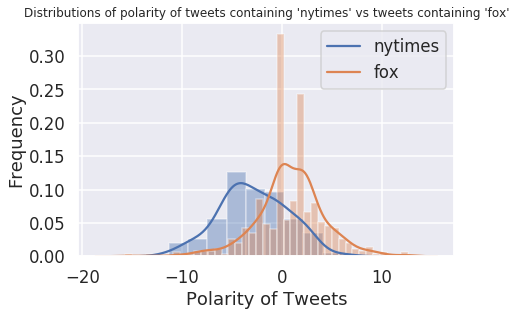

In [34]:
contains_nytimes = trump[trump['text'].str.contains('nytimes')]['polarity']
contains_fox = trump[trump['text'].str.contains('fox')]['polarity']
plt.figure(figsize=(6, 4))
sns.distplot(contains_nytimes)
sns.distplot(contains_fox)
plt.legend(['nytimes', 'fox'])
plt.title("Distributions of polarity of tweets containing 'nytimes' vs tweets containing 'fox'", fontsize=12);
plt.xlabel('Polarity of Tweets')
plt.ylabel('Frequency')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 6b
Comment on what you observe in the plot above. Can you find another pair of keywords that lead to interesting plots? Describe what makes the plots interesting. (If you modify your code in 6a, remember to change the words back to `nytimes` and `fox` before submitting for grading).

<!--
BEGIN QUESTION
name: q6b
points: 1
manual: true
-->

Text(0, 0.5, 'Frequency')

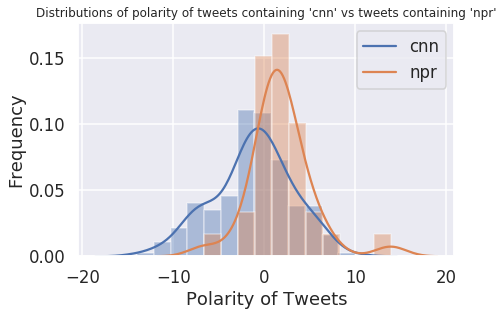

In [35]:
contains_cnn = trump[trump['text'].str.contains('cnn')]['polarity']
contains_npr = trump[trump['text'].str.contains('npr')]['polarity']
plt.figure(figsize=(6, 4))
sns.distplot(contains_cnn)
sns.distplot(contains_npr)
plt.legend(['cnn', 'npr'])
plt.title("Distributions of polarity of tweets containing 'cnn' vs tweets containing 'npr'", fontsize=12);
plt.xlabel('Polarity of Tweets')
plt.ylabel('Frequency')

In general, tweets containing the word "fox" had a higher polarity than tweets containing the word "nytimes". This means that there was a more positive sentiment in tweets containing "fox" than "nytimes". If we observe the words "cnn" and "npr", a similar relationship is observed. What is interesting is that CNN seems to have the highest frequency near a polarity of 0, i.e. the sentiment surrounding CNN is roughly neutral. It may be interesting to wonder if this is why Georgia (the home of CNN) is regarded as a swing state. 

It is also interesting to note that the word with the higher polarity has a higher maximum frequency e.g. 'fox' has a higher maximum frequency than 'nytimes' and 'npr' has a higher maximum frequency than 'cnn'. Perhaps this is because a greater proportion of Trump's tweets mention positive news associated to him, and Fox News and NPR were more pro-Trump than the NY Times and CNN.

<!-- END QUESTION -->



## Question 7

Now, let's see whether there's a difference in sentiment for tweets with hashtags and those without.

### Question 7a
First, we'll need to write some regex that can detect whether a tweet contains a hashtag or a link. We say that:

- A tweet is a retweet if it has the string 'rt' anywhere in the tweet if it is preceeded and followed by a non-word character (the start and end of the string count as non-word characters).
- A tweet has a hashtag if it has the character '#' anywhere in the tweet followed by a letter.
- A tweet contains a link or a picture if it has `http` anywhere in the tweet

(You can check out Trump's Twitter for why these criteria are true).

In the cell below, assign `rt_re` to a regex pattern that identifies retweets and `hash_link_re` to a regex pattern that identifies tweets with hashtags or links.

**Hints**: 
- Be sure to precede your regex pattern with `r` to make it a raw string (Ex: `r'pattern'`). To find out more, you can read the first paragraph of the [documentation](https://docs.python.org/2/library/re.html).
- You may find using regex word boundaries helpful for one of your patterns. 

<!--
BEGIN QUESTION
name: q7a
points: 2
-->

In [36]:
rt_re = r'\brt\b'
hash_link_re = r'#[A-Za-z]|http'

In [37]:
grader.check("q7a")

All tests passed!

### Question 7b
Let's see whether there's a difference in sentiments for tweets with hashtags/links and those without. 

*Note: You will get a UserWarning error when running the below cell. For the purpose of this homework, you can ignore it.*

Run the cell below to see a distribution of tweet sentiments based on whether a tweet contains a hashtag or link.

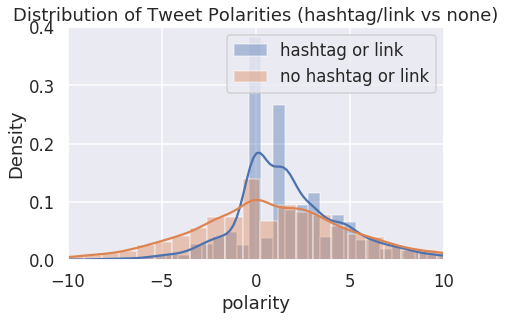

In [38]:
sns.distplot(trump[trump['text'].str.contains(hash_link_re)]['polarity'],label='hashtag or link');
sns.distplot(trump[~trump['text'].str.contains(hash_link_re)]['polarity'],label='no hashtag or link');
plt.xlim(-10, 10);
plt.ylim(0, 0.4);
plt.title('Distribution of Tweet Polarities (hashtag/link vs none)');
plt.legend();

<!-- BEGIN QUESTION -->

What do you notice about the distributions? Answer in 1-2 sentences.

<!--
BEGIN QUESTION
name: q7b
points: 1
manual: true
-->

In general, the distributions show that tweets with hashtags or links seem to have a more neutral polarity than tweets without hashtags or links because the frequency for the blue graph is higher than the frequency for the orange graph at polarity = 0. Furthermore, the distribution for tweets without hashtag or link is more of an 'even' distribution i.e. it has less gaps and looks more like a normal distribution than the distribution for tweets with hashtag or link. 

<!-- END QUESTION -->



## Congratulations! You have finished Homework 4!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [39]:
grader.check_all()

q1:

    All tests passed!
    

q2:

    All tests passed!
    

q4a:

    All tests passed!
    

q5c:

    All tests passed!
    

q5d:

    All tests passed!
    

q5e:

    All tests passed!
    

q5f:

    All tests passed!
    

q5g:

    All tests passed!
    

q7a:

    All tests passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export("hw4.ipynb")